In [2]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl

import neuro_morpho_toolbox as nmt
%matplotlib inline

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.93
Loading CCF brain structure data...
Loading time: 0.00


In [3]:
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


## Input list of interested

In [42]:


ll = '17302_0002317302_0002517545_0007118454_0005018454_0005118454_0005418454_0005518454_0005618454_0005718454_0005818454_0007418454_0009518454_0009718454_0009918454_0013018455_0012618455_0012718455_0013318455_0013418455_0016318455_0016618457_0011018457_0011118457_0013518458_00376'
interestL = []
i=0
while i<len(ll):
    interestL.append(str(ll[i:i+11]))
    i = i+11

### Copy interested swc to a specific folder specificNS

In [67]:
import os
import shutil
for i_swc in interestL:#os.listdir('/home/penglab/Desktop/specificNS' ):
    folder = os.path.exists('/home/penglab/Desktop/specificNS')
    if not folder:         
        os.makedirs('/home/penglab/Desktop/specificNS')       
    oldname = '/home/penglab/FeaCal/allData' + '/'+ str(i_swc)+'.swc'
    newname = '/home/penglab/Desktop/specificNS' + '/'+ str(i_swc)+'.swc'
    shutil.copyfile(oldname,newname)

### For neurons inside this folder, flip the swc 
* midline (0.5*nmt.annotation.size["z"]* nmt.annotation.space["z"])

In [68]:
swc_path = '/home/penglab/Desktop/specificNS'
from neuro_morpho_toolbox.neuron_set import load_swc_list
#Read the swc inside this path to adictionary
dicAll = load_swc_list(swc_path)
for i in dicAll.keys():
    midline = (0.5*nmt.annotation.size["z"]* nmt.annotation.space["z"])
    dicAll[i].swc.loc[dicAll[i].swc['z']>midline,'z'] = 2*midline-dicAll[i].swc.loc[dicAll[i].swc['z']>midline,'z'] 
    pathdes = '/home/penglab/Desktop/specificNS/'
    dicAll[i].swc.to_csv(pathdes+str(i)+'.swc', sep=" ")
    print(i)

    

17302_00023
17302_00025
17545_00071
18454_00050
18454_00051
18454_00054
18454_00055
18454_00056
18454_00057
18454_00058
18454_00074
18454_00095
18454_00097
18454_00099
18454_00130
18455_00126
18455_00127
18455_00133
18455_00134
18455_00163
18455_00166
18457_00110
18457_00111
18457_00135
18458_00376


In [69]:
ns = nmt.neuron_set('/home/penglab/Desktop/specificNS')
#pickle.dump([ns], open("/home/penglab/FeaCal/all_ns.pickle", "wb"))

Loading...
Finding soma locations...
Getting projection features...
Number of input neurons: 25
Number of input features: 632
Getting metadata...


IndexError: list index out of range

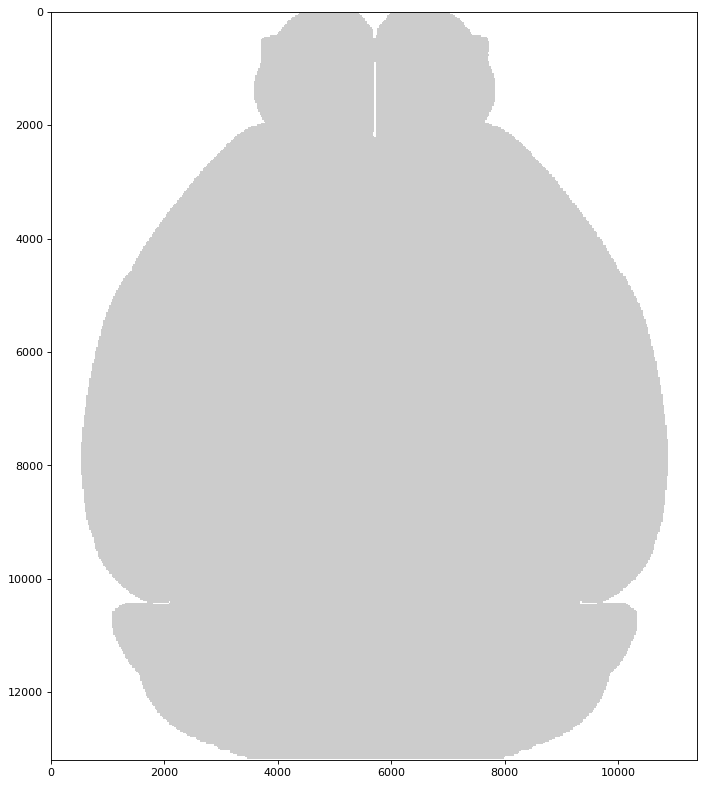

In [4]:
from neuro_morpho_toolbox.plot import cell_in_map

test_list = ns.metadata.index.tolist()
cell_in_map(ns.neurons, [], ns.metadata, ccf_annotation=nmt.annotation, view="Horizontal", color="single_cell")